In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import statsmodels.formula.api as smf

In [5]:
df = pd.read_csv('D:/Статистика/Data/states.csv')

In [6]:
# Построим плоскость предсказания
lm = smf.ols(formula='poverty ~ white + hs_grad', data=df).fit()
mesh_size = 1.0
margin = 2.0
x_min, x_max = df.white.min()- margin, df.white.max() + margin
y_min, y_max = df.hs_grad.min()- margin, df.hs_grad.max() + margin
z_pred = lambda x, y: lm.params.white * x  + lm.params.hs_grad * y + lm.params.Intercept
x_range = np.arange(x_min, x_max, mesh_size)
y_range = np.arange(y_min, y_max, mesh_size)
z_range = np.array([[z_pred(x, y) for x in x_range] for y in y_range])

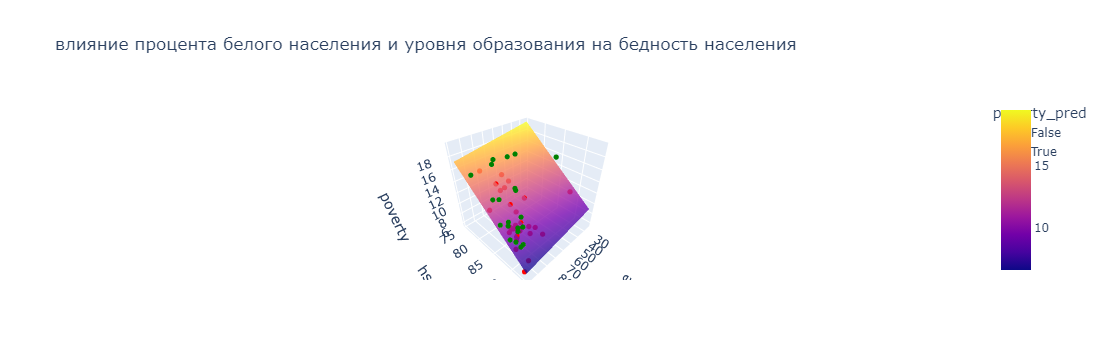

In [7]:
# какие значения выше предсказания, а какие ниже
df['poverty_pred'] = np.array([poverty >= z_pred(df.white[i], df.hs_grad[i]) for i, poverty in df.poverty.items()])

# составим график
fig = px.scatter_3d(df, x='white', y='hs_grad', z='poverty',
                    color='poverty_pred', color_discrete_sequence=['red', 'green'],
                   title='влияние процента белого населения и уровня образования на бедность населения')
fig.update_traces(marker=dict(size=3))
fig.add_traces(go.Surface(x=x_range,y=y_range, z=z_range, name='prediction', opacity=0.8))
fig.show()